<a href="https://colab.research.google.com/github/kla55/Pytorch_learning/blob/main/Pytorch_youtube/FreeCodeAcademy/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Wed Oct 25 04:23:40 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available else 'cpu'
device

2.1.0+cu118


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

In [3]:
# self driving cars,
# healthcare
# research and innovation

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In [4]:
# overfitting is when the model on the training dataset performs significantly better than the eval - this mean generalization does not occur

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [5]:
# 1. Train on more data
# 2. Regularization techniques
# 3. Use different models

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [6]:
import torch
import torchvision
from torchvision import datasets
from torchvision import transforms

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [7]:
train_data = datasets.MNIST(root=".",
                            train=True,
                            download=True,
                            transform=transforms.ToTensor())

test_data = datasets.MNIST(root=".",
                           train=False,
                           download=True,
                           transform=transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 141683375.00it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 39926069.16it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 51219719.43it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 18658696.15it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



55182
27698
50552
36418
58991


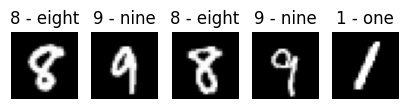

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,10))
rows, cols = 1, 5
for i in range(1, 6):
  random_inx = torch.randint(0,len(train_data), size =[1]).item()
  print(random_inx)
  image, label = train_data[random_inx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap = 'gray')
  plt.title(train_data.classes[label])
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [9]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = True)

print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x78ac52edf2b0>, <torch.utils.data.dataloader.DataLoader object at 0x78ac52edfb20>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [10]:
from torch import nn

class MNIST_model_v0(torch.nn.Module):
  def __init__(self, input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
                    nn.Conv2d(in_channels=input_shape,
                              out_channels=hidden_units,
                              kernel_size=3,
                              stride=1,
                              padding=1),
                    nn.ReLU(),
                    nn.Conv2d(in_channels=hidden_units,
                        out_channels=hidden_units,
                        kernel_size=3,
                        stride=1,
                        padding=1),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2))

    self.conv_block_2 = nn.Sequential(
                      nn.Conv2d(in_channels=hidden_units,
                                out_channels=hidden_units,
                                kernel_size=3,
                                stride=1,
                                padding=1),
                      nn.ReLU(),
                      nn.Conv2d(in_channels=hidden_units,
                                out_channels=hidden_units,
                                kernel_size=3,
                                stride=1,
                                padding=1),
                      nn.ReLU(),
                      nn.MaxPool2d(kernel_size=2))

    self.classifier = nn.Sequential(
                    nn.Flatten(),
                    nn.Linear(in_features=hidden_units*7*7,
                              out_features=output_shape))

  def forward(self, x):
                    x = self.conv_block_1(x)
                    # print(f"Output shape of conv block 1: {x.shape}")
                    x = self.conv_block_2(x)
                    # print(f"Output shape of conv block 2: {x.shape}")
                    x = self.classifier(x)
                    # print(f"Output shape of classifier: {x.shape}")
                    return x

In [11]:
model_V0 = MNIST_model_v0(input_shape=1,
                    hidden_units=10,
                    output_shape=10).to(device)
model_V0


MNIST_model_v0(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [12]:
dummy_x = torch.rand(size = (1, 28, 28)).unsqueeze( dim = 0).to(device)
model_V0(dummy_x)

tensor([[-0.0643,  0.0141,  0.0145,  0.0598, -0.0259, -0.0143, -0.0295, -0.0327,
         -0.0286, -0.0050]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [13]:
dummy_x.shape

torch.Size([1, 1, 28, 28])

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [14]:
from tqdm.auto import tqdm

model_cpu = MNIST_model_v0(input_shape=1,
                    hidden_units=10,
                    output_shape=10)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_cpu.parameters(), lr=0.1)

In [15]:
EPOCHS = 5

for epoch in tqdm(range(EPOCHS)):
  train_loss = 0
  model_cpu.train()
  for batch, (X, y) in enumerate(train_dataloader):
    X, y = X.to('cpu'), y.to('cpu')
    y_pred = model_cpu(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(train_dataloader)

  test_loss_total = 0
  model_cpu.eval()
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(test_dataloader):
      X_test, y_test = X_test.to("cpu"), y_test.to("cpu")
      test_pred = model_cpu(X_test)
      test_loss = loss_fn(test_pred, y_test)
      test_loss_total += test_loss
    test_loss_total /= len(test_dataloader)

  print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss_total:.3f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Loss: 0.325 | Test loss: 0.082
Epoch: 1 | Loss: 0.072 | Test loss: 0.044
Epoch: 2 | Loss: 0.056 | Test loss: 0.049
Epoch: 3 | Loss: 0.046 | Test loss: 0.038
Epoch: 4 | Loss: 0.041 | Test loss: 0.042


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

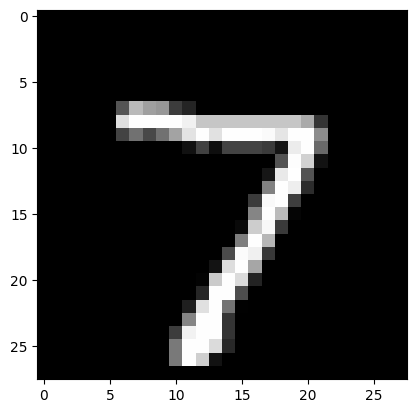

In [29]:
plt.imshow(test_data[0][0].squeeze(), cmap="gray")

In [34]:
test_data[0][0].shape

torch.Size([1, 28, 28])

In [60]:
model_pred_logits = model_cpu(test_data[0][0].unsqueeze(dim = 0))
model_pred_probs = torch.softmax(model_pred_logits, dim=1)
model_pred_probs_argm = torch.argmax(model_pred_probs, dim = 1)

print(model_pred_probs.shape, model_pred_probs_argm)

torch.Size([1, 10]) tensor([7])


In [72]:
val = 8

for i in range(1, 6):
  model_pred_logits = model_cpu(test_data[i][0].unsqueeze(dim = 0))
  model_pred_probs = torch.softmax(model_pred_logits, dim=1)
  model_pred_probs_argm = torch.argmax(model_pred_probs, dim = 1)

  # plt.figure()
  # plt.imshow(test_data[i][0].squeeze(), cmap='gray')
  print(model_pred_probs.shape, model_pred_probs_argm.item(), test_data[i][1])

torch.Size([1, 10]) 2 2
torch.Size([1, 10]) 1 1
torch.Size([1, 10]) 0 0
torch.Size([1, 10]) 4 4
torch.Size([1, 10]) 1 1


## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?